In [1]:
from decoder import PointCloudGraphDecoder
import utils

import torch
import numpy as np

import matplotlib.pyplot as plt

In [2]:
n_z = 16
n_edge_z = 8
dec = PointCloudGraphDecoder(n_z=n_z, n_node=8, n_edge_z=n_edge_z, n_edge_x=1, grid_size=10, radius=0.25)


In [3]:
#prepare some random latent variables

z = torch.from_numpy(np.random.randn(64, n_z).astype(np.float32))

z_edges = torch.from_numpy(np.random.randn(64, n_edge_z).astype(np.float32))

In [4]:
skeletons, mat, dummpy_pc = dec(z, z_edges)


In [5]:
print(skeletons.shape)
print(dummpy_pc.shape)
if mat is not None:
    print(mat)

torch.Size([64, 3, 8])
torch.Size([64, 3, 800])
tensor([[[0.6548, 0.5002, 0.5096,  ..., 0.5453, 0.4568, 0.4725],
         [0.5002, 0.5681, 0.4896,  ..., 0.4847, 0.4498, 0.4975],
         [0.5096, 0.4896, 0.5303,  ..., 0.4916, 0.5405, 0.4825],
         ...,
         [0.5453, 0.4847, 0.4916,  ..., 0.5548, 0.5021, 0.4576],
         [0.4568, 0.4498, 0.5405,  ..., 0.5021, 0.6480, 0.4253],
         [0.4725, 0.4975, 0.4825,  ..., 0.4576, 0.4253, 0.6080]],

        [[0.7423, 0.5288, 0.5606,  ..., 0.6440, 0.4260, 0.4195],
         [0.5288, 0.6206, 0.4904,  ..., 0.4790, 0.4920, 0.4259],
         [0.5606, 0.4904, 0.5883,  ..., 0.5506, 0.5778, 0.4725],
         ...,
         [0.6440, 0.4790, 0.5506,  ..., 0.6559, 0.5666, 0.4525],
         [0.4260, 0.4920, 0.5778,  ..., 0.5666, 0.8318, 0.4079],
         [0.4195, 0.4259, 0.4725,  ..., 0.4525, 0.4079, 0.6334]],

        [[0.6721, 0.4853, 0.5571,  ..., 0.4228, 0.4308, 0.5637],
         [0.4853, 0.7248, 0.5028,  ..., 0.5947, 0.4210, 0.7097],
         [

<IPython.core.display.Javascript object>


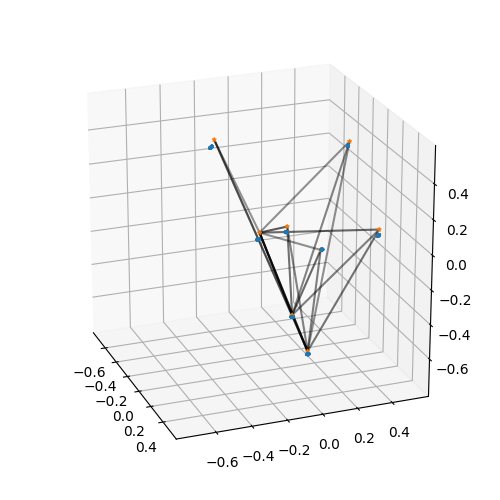

In [6]:
skeletons_numpy = skeletons.detach().numpy()
dummpy_pc_numpy = dummpy_pc.detach().numpy()
sample_idx = 1

%matplotlib notebook
fig = utils.plot_3d_point_cloud(dummpy_pc_numpy[sample_idx, 0, :], dummpy_pc_numpy[sample_idx, 1, :], dummpy_pc_numpy[sample_idx, 2, :])
utils.plot_3d_point_cloud_graph(skeletons_numpy[sample_idx], adjacency=mat[sample_idx], axis=fig.gca())

In [20]:
dummpy_pc_numpy[0]

array([[ 0.24891618,  0.24958482,  0.25030357, ..., -0.12124972,
        -0.12084792, -0.12038881],
       [ 0.14472379,  0.14465015,  0.1445912 , ..., -0.3467153 ,
        -0.34670326, -0.3469536 ],
       [-0.23320557, -0.23202716, -0.23072283, ..., -0.3246699 ,
        -0.32289812, -0.32145715]], dtype=float32)